# K-means

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

datos = pd.read_excel("migrantes y cl ctg bin.xlsx", index_col=0)

In [32]:
datos

,migrantes,cl,ppp,Grupo
Country Name,,,,
Albania,2.031094,-2626.953468,13498.196119,0
Angola,0.974588,514.453443,7042.923829,0
Argentina,4.621780,1670.700452,23290.675739,0
Armenia,13.737626,749.088295,13547.531399,0
Australia,25.484226,-2778.520683,50192.957328,0
...,...,...,...,...
United States,12.885845,-2778.520683,62805.253758,0
Uruguay,2.712775,1670.700452,23738.507963,0
Vietnam,0.067809,-2379.709583,9866.217883,0


In [33]:
# Supongamos que 'datos' es tu DataFrame original

# Encuentra el índice del país que deseas eliminar (en este caso, Emiratos Árabes Unidos)
indice_emiratos = datos[datos.index == 'United Arab Emirates'].index

# Elimina la fila correspondiente a Emiratos Árabes Unidos
datos_sin_emiratos = datos.drop(indice_emiratos)

# Verifica el DataFrame resultante
print(datos_sin_emiratos.head())


              migrantes           cl           ppp  Grupo
Country Name                                             
Albania        2.031094 -2626.953468  13498.196119      0
Angola         0.974588   514.453443   7042.923829      0
Argentina      4.621780  1670.700452  23290.675739      0
Armenia       13.737626   749.088295  13547.531399      0
Australia     25.484226 -2778.520683  50192.957328      0


In [34]:
datos = datos_sin_emiratos


In [35]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, Albania to Nz
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   migrantes  91 non-null     float64
 1   cl         91 non-null     float64
 2   ppp        91 non-null     float64
 3   Grupo      91 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 3.6+ KB


In [36]:
nombres = datos.index

In [37]:
nombres

Index(['Albania', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bangladesh', 'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Burkina Faso',
       'Chad', 'Chile', 'China', 'Hong Kong SAR, China', 'Macao SAR, China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Greece',
       'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'Indonesia',
       'Iran, Islamic Rep.', 'Ireland', 'Japan', 'Kazakhstan', 'Kenya',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius',
       'Mexico', 'Mongolia', 'Mozambique', 'Netherlands', 'Nicaragua', 'Niger',
       'Nigeria', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Korea, Rep.', 'Moldova', 'Romania',
       'Russian Federation', 'Rwanda', 'Serbia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South A

In [38]:
datos

,migrantes,cl,ppp,Grupo
Country Name,,,,
Albania,2.031094,-2626.953468,13498.196119,0
Angola,0.974588,514.453443,7042.923829,0
Argentina,4.621780,1670.700452,23290.675739,0
Armenia,13.737626,749.088295,13547.531399,0
Australia,25.484226,-2778.520683,50192.957328,0
...,...,...,...,...
United States,12.885845,-2778.520683,62805.253758,0
Uruguay,2.712775,1670.700452,23738.507963,0
Vietnam,0.067809,-2379.709583,9866.217883,0


In [39]:
#Borré la columna binaria "Grupo"
del datos["Grupo"]
del datos["ppp"]

In [40]:
datos

,migrantes,cl
Country Name,,
Albania,2.031094,-2626.953468
Angola,0.974588,514.453443
Argentina,4.621780,1670.700452
Armenia,13.737626,749.088295
Australia,25.484226,-2778.520683
...,...,...
United States,12.885845,-2778.520683
Uruguay,2.712775,1670.700452
Vietnam,0.067809,-2379.709583


In [41]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'datos' es tu DataFrame original con los nombres de los países como índice
# y las columnas que quieres escalar.

# Guardar la columna de nombres de los países
nombres_paises = datos.index

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Escalar solo las columnas numéricas (excluyendo la columna de nombres)
datos_escala = pd.DataFrame(scaler.fit_transform(datos), columns=datos.columns, index=nombres_paises)

# Agregar la columna de nombres de nuevo al DataFrame escalado
datos_escala['Nombres_Paises'] = nombres_paises

# Establecer la columna de nombres como índice
datos_escala.set_index('Nombres_Paises', inplace=True)

# Verificar el DataFrame resultante
print(datos_escala.head())



                migrantes        cl
Nombres_Paises                     
Albania          0.034129  0.051840
Angola           0.015901  0.397444
Argentina        0.078824  0.524649
Armenia          0.236095  0.423257
Australia        0.438752  0.035165


In [42]:
datos = datos_escala

In [43]:
datos

,migrantes,cl
Nombres_Paises,,
Albania,0.034129,0.051840
Angola,0.015901,0.397444
Argentina,0.078824,0.524649
Armenia,0.236095,0.423257
Australia,0.438752,0.035165
...,...,...
United States,0.221400,0.035165
Uruguay,0.045889,0.524649
Vietnam,0.000257,0.079041


In [44]:
# Ahora si viene lo chido con el K-means

kmeans = KMeans(n_clusters=5).fit(datos.values)

datos["cluster"] = kmeans.labels_

datos




C:\Users\Juan David Casallas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Juan David Casallas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,migrantes,cl,cluster
Nombres_Paises,,,
Albania,0.034129,0.051840,1
Angola,0.015901,0.397444,4
Argentina,0.078824,0.524649,0
Armenia,0.236095,0.423257,4
Australia,0.438752,0.035165,3
...,...,...,...
United States,0.221400,0.035165,1
Uruguay,0.045889,0.524649,0
Vietnam,0.000257,0.079041,1


In [45]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.09369571 0.56201979]
 [0.09078694 0.0943647 ]
 [0.77165018 1.        ]
 [0.37665319 0.09671588]
 [0.07695244 0.34043885]] 1.1547853557972105


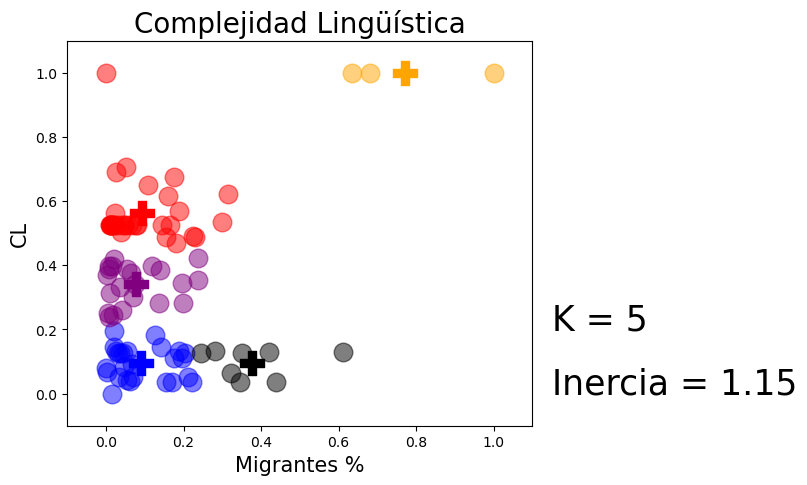

In [46]:
#Gráfica de dispersión para 2 dimensiones

# Instrucciones para graficar los clusters 

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(datos[datos["cluster"] == cluster]["migrantes"],
                datos[datos["cluster"] == cluster]["cl"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster])

plt.title("Complejidad Lingüística", fontsize=20)
plt.xlabel("Migrantes %", fontsize=15)
plt.ylabel("CL", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)  

plt.savefig("grafica_clusteres.png") 
plt.show()



In [18]:
indice_max = datos['migrantes'].idxmax()
print(f"Índice del país con valor máximo: {indice_max}")


Índice del país con valor máximo: Macao SAR, China


# Método del codo

In [19]:
#Cálculo del número de Clusters (K)
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(datos.values)
    inercias.append(kmeans.inertia_)


C:\Users\Juan David Casallas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Juan David Casallas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Juan David Casallas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Juan David Casallas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

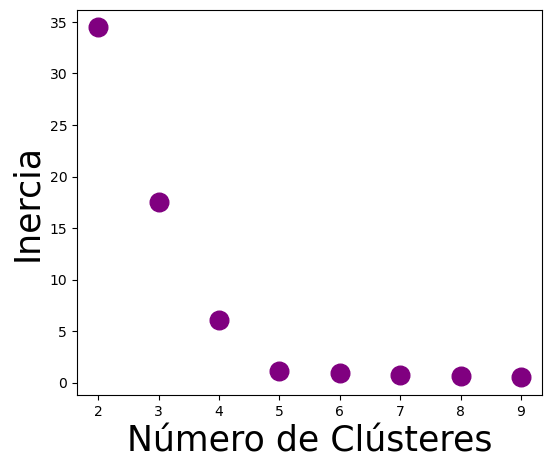

In [29]:
#Gráfica de las inercias variando los K's

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clústeres", fontsize=25)
plt.ylabel("Inercia", fontsize=25)

#Exportar la gráfica: 
plt.savefig("grafica_inercias.png") 
plt.show()

In [22]:
#De la gráfica anterior, para estos datos es ideal 4-5 número de clusters

In [23]:
datos

,migrantes,cl,cluster
Nombres_Paises,,,
Albania,0.034129,0.051840,0
Angola,0.015901,0.397444,1
Argentina,0.078824,0.524649,2
Armenia,0.236095,0.423257,1
Australia,0.438752,0.035165,3
...,...,...,...
United States,0.221400,0.035165,3
Uruguay,0.045889,0.524649,2
Vietnam,0.000257,0.079041,0


# Mostrar los países en cada uno de los clústeres

In [24]:
# Suponiendo que 'datos' contiene la columna 'cluster' y los nombres de los países como índice
# Asegúrate de tener la columna 'cluster' en tu DataFrame

# Agrupar por la columna 'cluster' y obtener una lista de países para cada cluster
tabla_clusters = datos.groupby('cluster').apply(lambda group: list(group.index))

# Mostrar la tabla
print(tabla_clusters)


cluster
0    [Albania, Bangladesh, Burkina Faso, Georgia, G...
1    [Angola, Armenia, Belarus, Belgium, Brazil, Ch...
2    [Argentina, Bolivia, Chile, China, Colombia, C...
3    [Australia, Austria, Cyprus, France, Gabon, Ge...
4    [Hong Kong SAR, China, Macao SAR, China, Singa...
dtype: object


In [25]:
# Para ver más fácil los clústeres
# Convertir la Serie a un diccionario
diccionario_clusters = datos.groupby('cluster').apply(lambda group: list(group.index)).to_dict()

# Mostrar el diccionario de una manera más legible
for cluster, paises in diccionario_clusters.items():
    print(f'Cluster {cluster}: {paises}')


Cluster 0: ['Albania', 'Bangladesh', 'Burkina Faso', 'Georgia', 'Greece', 'Indonesia', 'Kenya', 'Malaysia', 'Malta', 'Mauritius', 'Niger', 'Moldova', 'Romania', 'Rwanda', 'South Africa', 'Togo', 'Turkiye', 'Uganda', 'United Kingdom', 'Tanzania', 'Vietnam']
Cluster 1: ['Angola', 'Armenia', 'Belarus', 'Belgium', 'Brazil', 'Chad', 'Denmark', 'Ethiopia', 'Finland', 'Hungary', 'Iran, Islamic Rep.', 'Mongolia', 'Mozambique', 'Nigeria', 'Philippines', 'Poland', 'Portugal', 'Russian Federation', 'Sri Lanka', 'Sudan', 'Tunisia', 'Ukraine']
Cluster 2: ['Argentina', 'Bolivia', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czechia', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Guatemala', 'Honduras', 'Iceland', 'Japan', 'Latvia', 'Lithuania', 'Mexico', 'Netherlands', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Korea, Rep.', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Uruguay']
Cluster 3: ['Australia', 'Austria', 'Cyprus', 'France', 'Gabon', 'Germ

In [27]:

# Convertir la Serie a un diccionario
diccionario_clusters = datos.groupby('cluster').apply(lambda group: list(group.index)).to_dict()

# Crear un DataFrame a partir del diccionario
tabla_clusters = pd.DataFrame.from_dict(diccionario_clusters, orient='index').T

# Agregar un encabezado a cada columna
tabla_clusters.columns = [f'Cluster {cluster}' for cluster in tabla_clusters.columns]

# Mostrar el DataFrame
print(tabla_clusters)


         Cluster 0           Cluster 1           Cluster 2      Cluster 3  \
0          Albania              Angola           Argentina      Australia   
1       Bangladesh             Armenia             Bolivia        Austria   
2     Burkina Faso             Belarus               Chile         Cyprus   
3          Georgia             Belgium               China         France   
4           Greece              Brazil            Colombia          Gabon   
5        Indonesia                Chad          Costa Rica        Germany   
6            Kenya             Denmark             Croatia        Ireland   
7         Malaysia            Ethiopia             Czechia     Kazakhstan   
8            Malta             Finland  Dominican Republic     Luxembourg   
9        Mauritius             Hungary             Ecuador    Switzerland   
10           Niger  Iran, Islamic Rep.         El Salvador  United States   
11         Moldova            Mongolia             Estonia         Canada   

In [47]:
import pandas as pd

# Tu código para generar el DataFrame tabla_clusters

# Especificar la ruta y el nombre del archivo Excel de salida
ruta_salida_excel = "tabla_clusters.xlsx"

# Exportar el DataFrame a un archivo de Excel
tabla_clusters.to_excel(ruta_salida_excel, index=False)

print(f"DataFrame exportado exitosamente a '{ruta_salida_excel}'")


DataFrame exportado exitosamente a 'tabla_clusters.xlsx'
